# Модели классификации

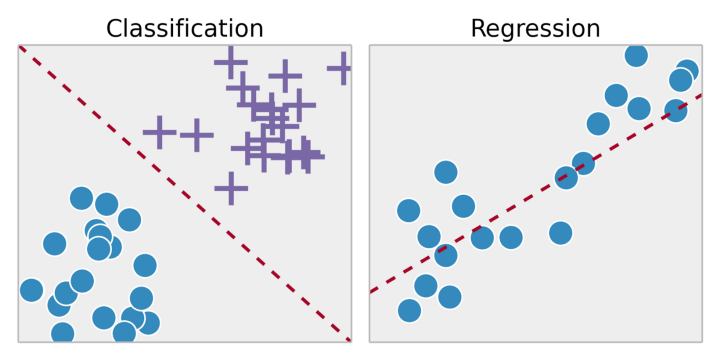

[Источник](https://evileg.com/ru/post/300/)

## Что мы изучим на этом занятии

* Классификация
    * Что такое классификация
    * Виды классификации
    * Метрики для оценка качества классификации
    * Логистическая регрессия
    * Байесовский классификатор
    * Метод опорных векторов (SVM)

## Классификация

### Что такое классификация?

Другой задачей, решаемой машинным обучением, является *классификация*. В ней так же происходит предсказание на основе входных данных, только уже предсказывается не число, какой-либо класс или категория. Цель классификации — **предсказать, к какому из классов относится новый объект на основе его признаков**.

Классификация позволяет решать такие задачи:

1. Распознавание изображений: отнесение изображения к одной из нескольких категорий. Например, распознавание, является ли изображение кошкой или собакой.

2. Классификация текста: задача определения, к какому классу относится текст. Примером может быть классификация писем на спам и не-спам.

3. Медицинская диагностика: определение, принадлежит ли пациент к группе риска по какому-либо заболеванию на основе его медицинских данных.

4. и другие...

Как и с регрессией, для классификации существуют разные модели, которые мы скоро рассмотрим.

### Виды классификации

1. **Бинарная классификация**:
   Это самый простой тип классификации, когда существует всего два класса (например, положительный или отрицательный исход). Примеры:
   - Спам или не спам.
   - Болен или здоров.
   
   В бинарной классификации модель предсказывает вероятность принадлежности объекта к одному из двух классов.

2. **Многоклассовая классификация**:
   В этой задаче существует больше двух классов. Примеры:
   - Распознавание рукописных цифр (классы: 0, 1, 2, ..., 9).
   - Классификация видов животных по изображениям.

3. **Многометочная классификация (multi-label classification)**:
   В этой задаче объект может принадлежать сразу к нескольким классам одновременно. Пример — система рекомендаций фильмов, где каждый фильм может быть отнесён к нескольким жанрам (комедия, драма, боевик и т.д.).

### Метрики для оценки качества классификации

Для оценки классификатора применяются различные метрики, каждая из которых акцентирует внимание на разных аспектах работы модели

#### Точность (Accuracy)

Доля правильно классифицированных объектов среди всех объектов.
     
$$ \text{Точность} = \frac{\text{Число правильных предсказаний}}{\text{Общее число предсказаний}} $$

Точность хорошо работает, когда классы сбалансированы, но может вводить в заблуждение при дисбалансе классов (например, когда один класс сильно преобладает).

#### Матрица ошибок (Confusion Matrix)

Таблица, которая показывает количество правильных и неправильных предсказаний для каждого класса. Она позволяет увидеть, как часто модель путает классы.
     
Пример матрицы ошибок для бинарной классификации:
$$
\begin{bmatrix}
TP & FP \\
FN & TN
\end{bmatrix}
$$
Где:
- **TP** (True Positive) — модель правильно предсказала положительный класс,
- **TN** (True Negative) — модель правильно предсказала отрицательный класс,
- **FP** (False Positive) — модель ошибочно предсказала положительный класс, когда на самом деле класс отрицательный,
- **FN** (False Negative) — модель ошибочно предсказала отрицательный класс.

#### Полнота (Recall)

Доля объектов положительного класса, которые были правильно классифицированы моделью.
     
$$ \text{Полнота} = \frac{\text{TP}}{\text{TP + FN}} $$

#### Точность предсказания (Precision)

Доля объектов, предсказанных моделью как положительные, которые действительно являются положительными.

$$ \text{Точность предсказания} = \frac{\text{TP}}{\text{TP + FP}} $$

#### F-мера (F1-score)

Гармоническое среднее между полнотой и точностью предсказания. Используется, когда важно балансировать между этими двумя метриками.

$$ F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision + Recall}} $$

### Логистическая регрессия

**Логистическая регрессия** — это метод машинного обучения, используемый для решения задач классификации, в основном бинарной классификации, когда нужно предсказать принадлежность объекта к одному из двух классов (например, "да/нет", "спам/не спам"). Несмотря на название, это не метод регрессии, а именно классификации.



#### Основная идея


Логистическая регрессия строит модель, которая предсказывает вероятность принадлежности объекта к одному из классов. Для этого она использует **логистическую функцию** (сигмоиду), которая преобразует любое входное значение в число в диапазоне от 0 до 1, интерпретируемое как вероятность.



#### Математическая формулировка


В основе логистической регрессии лежит линейная модель, аналогичная линейной регрессии, но вместо предсказания значения целевой переменной, мы предсказываем **вероятность** принадлежности объекта к классу.

Для некоторого объекта с признаками $X = \{x_1, x_2, ..., x_n\}$ линейная модель строит взвешенную сумму этих признаков:

$$ z = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n $$

Где:
- $z$ — это линейная комбинация признаков,
- $w_0, w_1, \dots, w_n$ — веса модели (коэффициенты).

Затем логистическая функция (сигмоида) преобразует результат $z$ в вероятность:

$$ P(y=1|X) = \sigma(z) = \frac{1}{1 + e^{-z}} $$

Где:
- $\sigma(z)$ — логистическая функция, которая всегда возвращает значение в диапазоне от 0 до 1,
- $P(y=1|X)$ — вероятность того, что объект принадлежит к классу 1.

Если вероятность больше 0.5, модель предсказывает класс 1, если меньше — класс 0.


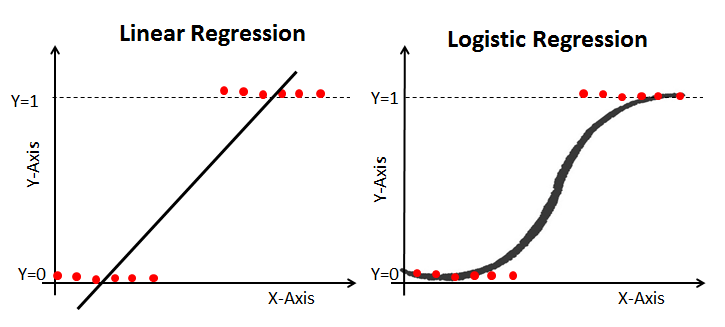

[Источник](https://datascience.eu/ru/%D0%BF%D1%80%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5/%D0%BF%D0%BE%D0%BD%D0%B8%D0%BC%D0%B0%D0%BD%D0%B8%D0%B5-%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B9-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8-%D0%BD/)

#### Функция потерь



Для обучения логистической регрессии используется **логистическая функция потерь** (log-loss или бинарная кросс-энтропия), которая наказывает модель за уверенные, но неверные предсказания. Функция потерь для одного объекта выглядит так:

$$
\text{Log-loss} = - \left[ y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right]
$$

Где:
- $y$ — истинная метка класса (0 или 1),
- $\hat{y}$ — предсказанная моделью вероятность того, что объект принадлежит к классу 1.

Цель обучения логистической регрессии — минимизировать сумму логистических потерь для всех объектов.

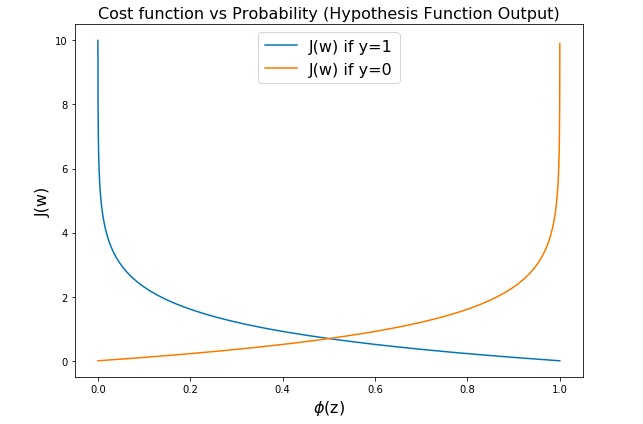

[Источник](https://vitalflux.com/cross-entropy-loss-explained-with-python-examples/)

#### Пример использования

Чтобы показать, как можно обучить бинарную логистическую регрессию, загрузим датасет Ирисов и выберем данные только из двух классов

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Загрузка датасета ирисов
iris = load_iris()

# Используем только два класса для бинарной классификации
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]

# Выбираем два признака для визуализации (например, длина и ширина лепестка)
X = X[:, [2, 3]]

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Skearn предоставляет класс [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) для обучения логистической регрессии. Чтобы посмотреть метрики используется [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Создание и обучение модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка точности модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Мы можем также визуализировать границу решений модели с помощью [DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html)

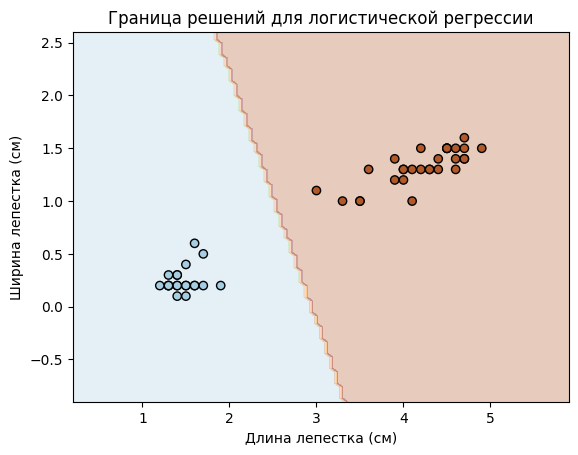

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# Визуализация границы решений с использованием DecisionBoundaryDisplay
fig, ax = plt.subplots()

# Построение границы решений
DecisionBoundaryDisplay.from_estimator(model, X_train, response_method="predict", ax=ax, cmap=plt.cm.Paired, alpha=0.3)

# Добавление точек данных
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.Paired)

# Настройка подписей осей
ax.set_xlabel('Длина лепестка (см)')
ax.set_ylabel('Ширина лепестка (см)')
ax.set_title('Граница решений для логистической регрессии')

# Показать график
plt.show()


### Байесовский классификатор


Байесовский классификатор (или наивный байесовский классификатор) — это семейство простых и эффективных алгоритмов машинного обучения, основанных на применении теоремы Байеса с "наивным" предположением о независимости признаков.

#### Основная идея

Байесовский классификатор использует теорему Байеса для вычисления вероятности того, что объект с определёнными признаками принадлежит к определённому классу. Основное предположение — признаки объекта независимы между собой, что редко бывает в реальных данных, но на практике это упрощение часто даёт хорошие результаты.

#### Теорема Байеса

Теорема Байеса позволяет обновлять вероятности гипотез на основе новых данных. Формула теоремы выглядит следующим образом:

$$
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
$$

Где:

- $P(A|B)$ — апостериорная вероятность гипотезы $A$ при условии данных $B$.
- $P(B|A)$ — вероятность данных $B$ при условии, что гипотеза $A$ истинна.
- $P(A)$ — априорная вероятность гипотезы $A$.
- $P(B)$ — вероятность наблюдения данных $B$.

#### Наивное предположение о независимости признаков

Наивный байесовский классификатор предполагает, что все признаки $X_i$ независимы друг от друга при условии класса $C$. Это упрощает вычисление совместной вероятности, поскольку:

$$
P(X_1, X_2, ..., X_n | C) = \prod_{i=1}^{n} P(X_i | C)
$$

#### Математическая формулировка

Задача — вычислить апостериорную вероятность класса $C_k$ при заданных признаках $X = \{X_1, X_2, ..., X_n\}$:

$$
P(C_k | X) = \frac{P(C_k) \cdot P(X | C_k)}{P(X)}
$$

Поскольку $P(X)$ одинаково для всех классов, для классификации достаточно максимизировать числитель:

$$
\hat{C} = \arg\max_{C_k} P(C_k) \prod_{i=1}^{n} P(X_i | C_k)
$$

Где:

- $P(C_k)$ — априорная вероятность класса $C_k$.
- $P(X_i | C_k)$ — вероятность признака $X_i$ при условии класса $C_k$.

#### Виды наивных байесовских классификаторов



1. **Гауссовский наивный Байес**: Используется для непрерывных данных, предполагая, что признаки распределены по нормальному распределению.

2. **Мультиномиальный наивный Байес**: Применяется для дискретных счётных признаков, например, для моделирования частоты слов в тексте.

3. **Бернуллиевский наивный Байес**: Используется для бинарных признаков, где каждый признак может принимать только два значения (0 или 1).

#### Пример использования

Загрузим датасет Ирисов и выберем данные только из двух классов

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Загрузка датасета ирисов
iris = load_iris()

# Используем только два класса для бинарной классификации
X = iris.data[iris.target != 2]
y = iris.target[iris.target != 2]

# Выбираем два признака для визуализации (например, длина и ширина лепестка)
X = X[:, [2, 3]]

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

Так как мы используем численные признаки для предсказания классов, то будем использовать Гауссовский Байесовский классификатор. Он реализован в классе [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Создание и обучение модели гауссовского наивного Байеса
model = GaussianNB()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка точности модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



Визуализируем границы решений

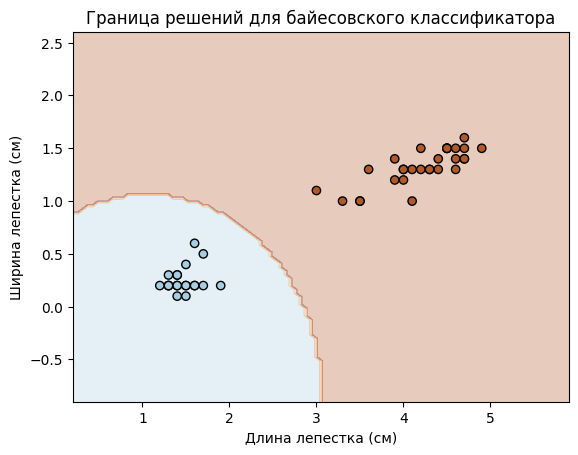

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# Визуализация границы решений с использованием DecisionBoundaryDisplay
fig, ax = plt.subplots()

# Построение границы решений
DecisionBoundaryDisplay.from_estimator(model, X_train, response_method="predict", ax=ax, cmap=plt.cm.Paired, alpha=0.3)

# Добавление точек данных
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor="k", cmap=plt.cm.Paired)

# Настройка подписей осей
ax.set_xlabel('Длина лепестка (см)')
ax.set_ylabel('Ширина лепестка (см)')
ax.set_title('Граница решений для байесовского классификатора')

# Показать график
plt.show()


### Метод опорных векторов (SVM)

**Метод опорных векторов (SVM, Support Vector Machine)** — это популярный алгоритм машинного обучения, который используется не только для классификации, но также и для регрессии. Основная идея SVM заключается в нахождении оптимальной гиперплоскости, которая максимально разделяет классы в многомерном пространстве признаков.

#### Основные концепции метода опорных векторов

**Гиперплоскость**

В пространстве признаков, гиперплоскость — это множество точек, которое разделяет данные на два класса. В двумерном пространстве гиперплоскость — это линия, в трёхмерном — это плоскость, а в более высоких измерениях — многомерная плоскость.



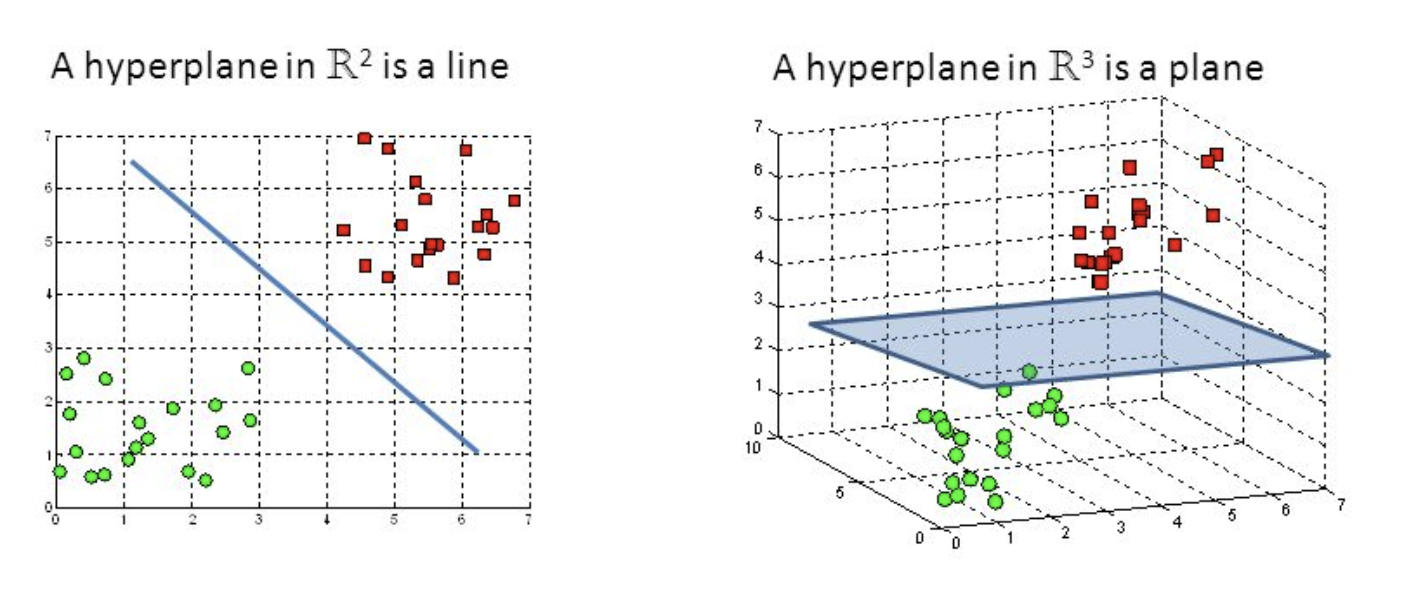

[Источник](https://deepai.org/machine-learning-glossary-and-terms/hyperplane)

**Оптимальная гиперплоскость**

SVM ищет такую гиперплоскость, которая максимально отделяет два класса данных. Оптимальная гиперплоскость — это та, которая максимизирует **зазор (margin)**, то есть расстояние от гиперплоскости до ближайших точек каждого класса.



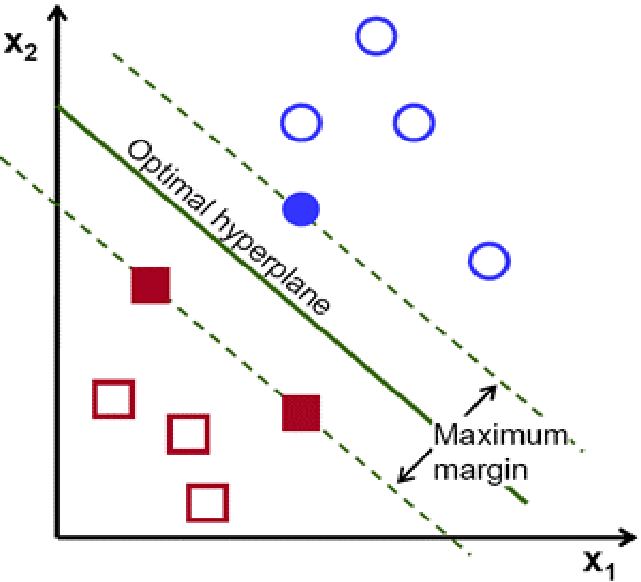

[Источник](https://www.researchgate.net/figure/Optimal-Hyperplane-and-Margin-of-SVM_fig3_338698374)

**Опорные векторы**

Это точки данных (объекты), которые находятся ближе всего к гиперплоскости и определяют её положение и ориентацию. Именно эти точки используются для нахождения оптимальной гиперплоскости.

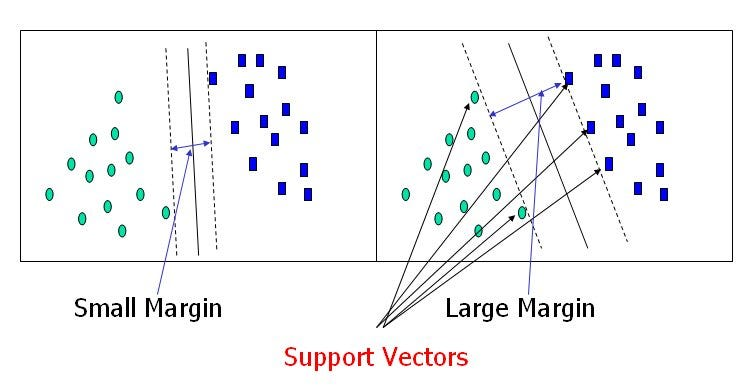

[Источник](https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47)

#### Ключевые идеи SVM

**Линейно разделимые данные**

Для линейно разделимых данных SVM пытается найти такую гиперплоскость, которая отделяет два класса с наибольшим зазором. Если данные линейно разделимы, то существует несколько гиперплоскостей, которые могут разделить данные, но SVM выбирает ту, которая максимизирует зазор между классами.

Гиперплоскость можно описать как линейное уравнение:

$$
w \cdot x + b = 0
$$

Где:
- $w$ — вектор весов (перпендикулярный гиперплоскости),
- $x$ — вектор признаков,
- $b$ — смещение гиперплоскости.

Алгоритм SVM сводится к задаче оптимизации, где необходимо максимизировать зазор между классами, при этом сохраняя правильную классификацию точек.

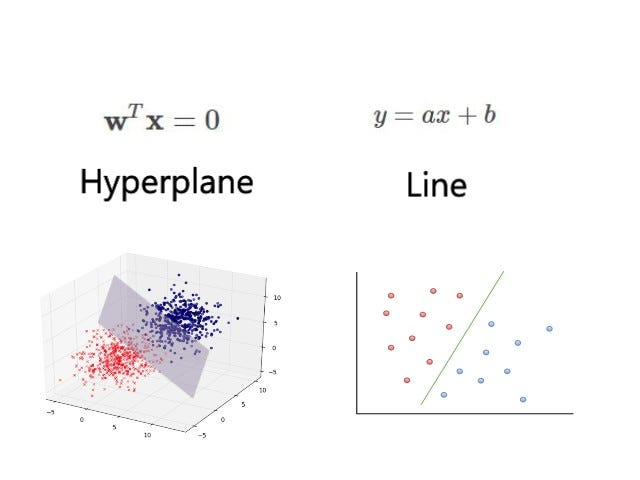

[Источник](https://medium.com/@swastiknayak76/linear-algebra-for-data-science-and-machine-learning-caa886e38a84)

**Линейно неразделимые данные и мягкий зазор**

В реальных задачах данные часто не могут быть разделены идеально с помощью линейной гиперплоскости. В таких случаях используется концепция **мягкого зазора (soft margin)**, которая допускает наличие некоторых ошибок классификации.

Для этого вводится параметр $C$, который регулирует баланс между максимизацией зазора и количеством ошибок:
- При большом значении $C$ модель стремится минимизировать ошибки, что может привести к переобучению.
- При малом значении $C$ модель допускает больше ошибок, что повышает её обобщающую способность.




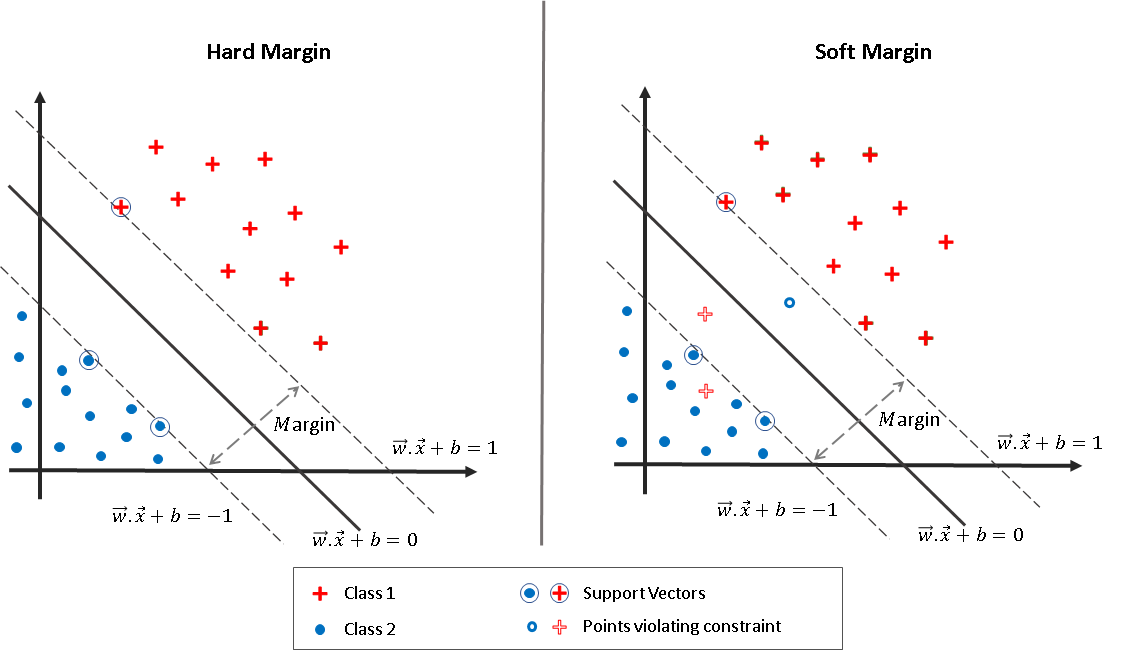

[Источник](https://pub.aimind.so/soft-margin-svm-exploring-slack-variables-the-c-parameter-and-flexibility-1555f4834ecc)

**Ядра (Kernel Trick)**

SVM также может решать задачи с нелинейно разделимыми данными с помощью применения ядра (kernel trick). Основная идея заключается в том, чтобы преобразовать исходное пространство признаков в пространство более высокой размерности, где данные становятся линейно разделимыми.

Применение ядра позволяет SVM строить нелинейные разделяющие границы, неявно вычисляя скалярные произведения признаков в новом пространстве.

Типы ядер:
- **Линейное ядро**: используется для линейных данных.
- **Полиномиальное ядро**: хорошо подходит для более сложных нелинейных разделений.
- **Радиальное базисное ядро (RBF)**: используется для сложных нелинейных задач. Оно преобразует пространство в бесконечную размерность.

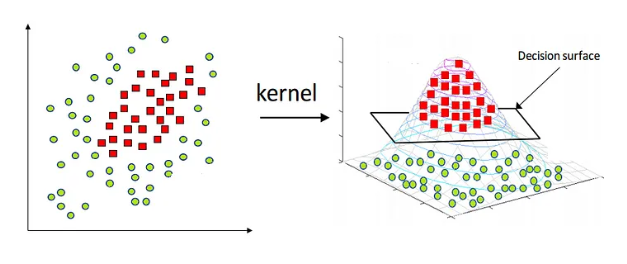

[Источник](https://medium.com/@Suraj_Yadav/what-is-kernel-trick-in-svm-interview-questions-related-to-kernel-trick-97674401c48d)

#### Пример использования

Загрузим датасет Ирисов

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Загрузка данных
iris = load_iris()
X = iris.data[:, :2]  # Используем только два признака для визуализации
y = iris.target

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Для классификации методом опорных векторов используется [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Создание и обучение модели SVM с RBF ядром
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества модели
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



Покажем границы решений модели

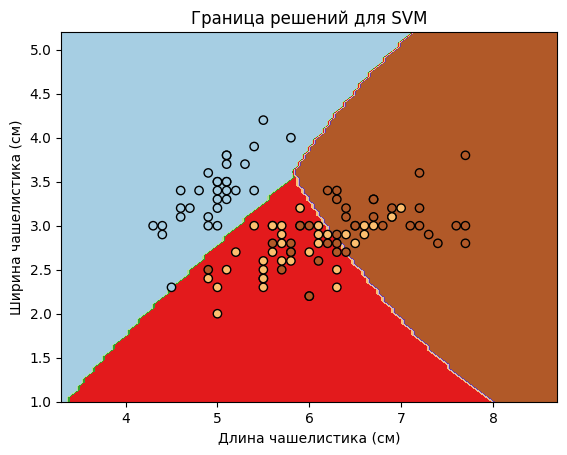

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay

# Визуализация границы решений
fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(model, X_train, response_method="predict", ax=ax, cmap=plt.cm.Paired)

# Добавление точек данных
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)

# Настройка подписей осей
ax.set_xlabel('Длина чашелистика (см)')
ax.set_ylabel('Ширина чашелистика (см)')
ax.set_title('Граница решений для SVM')
plt.show()


## Упражнение 2

*Заполните пропуски, обозначенные троеточием (...)*

*Подсказка: Если вы не знаете, как заполнить пропуск - посмотрите на примеры, представленные выше и в предыдущих занятиях*

Выполните классификацию на датасете `titanic` с помощью логистической регрессии, байесовского классификатора.

Загрузим датасет `titanic`

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Загрузка датасета "titanic"
data = sns.load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Реализуем функцию предобработки данных, которая выполняет ипьютинг, удаление строк с пустыми значениями, и энкодинг

In [ ]:
# Импортируем импьютер
from sklearn.impute import ...
# Импортируем энкодер для признаков
from sklearn.preprocessing import ...
# Импортируем LabelEncoder для целевой переменной
from sklearn.preprocessing import ...
# Импортируем масштабатор
from sklearn.preprocessing import ...

# Фукнция для подготовки данных
def preprocess_data(data):

    # Создадим импьютер для колонки age
    age_imp = ...
    # Применим имюпьтер для колонки age
    data['age'] = ...

    # Создадим импьютер для колонки deck
    deck_imp = ...
    # Применим имюпьтер для колонки deck
    data['deck'] = ...

    # Избавимся от всех остальных строк с пустыми значениями
    data = data.dropna()

    # Разделим признаки на численные и категориальные
    X_num = data[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']]
    X_cat = data[['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alone']]

    # Создадим энкодер для категориальных признаков
    enc = ...
    # Применим энкодер
    X_cat = ...

    # Соединим X_num и X_cat
    X = np.hstack([X_num, X_cat.toarray()])

    # Создадим энкодер для целевой переменной
    le = LabelEncoder()
    # Применим энкодер к целевой переменной
    y = le.fit_transform(data['alive'])

    # Создадим масштабатор
    scaler = ...
    # Мастабируем данные
    X = ...

    return X, y

Разделим датасет и применим функцию предобработки

In [ ]:
# Разделение данных на обучающую и тестовую выборки с test_size=0.3 и random_state=42
data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)

# Применим функцию предобработки данных
X_train, y_train = preprocess_data(data_train)
X_test, y_test = preprocess_data(data_test)

Обучим и протестируем логистическую регрессию

In [ ]:
# Создание и обучение модели логистической регрессии
log_reg = ...
...

# Предсказание на тестовых данных
y_pred = ...

# Оценка качества модели
print("Classification Report:")
print(...)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       110

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



Обучим и протестируем байесовскую модель

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Создание и обучение модели байесовской модели
model = ...
...

# Предсказание на тестовых данных
y_pred = ...

# Оценка качества модели
print("Classification Report:")
print(...)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       110

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



Обучим и протестируем SVC модель

In [ ]:
from sklearn.svm import SVC

# Создание и обучение модели SVC модели
model = ...
...

# Предсказание на тестовых данных
y_pred = ...

# Оценка качества модели
print("Classification Report:")
print(...)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       157
           1       0.97      0.98      0.98       110

    accuracy                           0.98       267
   macro avg       0.98      0.98      0.98       267
weighted avg       0.98      0.98      0.98       267



## Заключение

На этом занятии мы познакомились с основными концепциями классификации в машинном обучении. Мы рассмотрели, что такое классификация, изучили различные её виды — от бинарной до многометочной классификации, а также познакомились с ключевыми метриками, которые используются для оценки качества классификационных моделей. В частности, мы узнали о таких метриках, как точность, полнота, точность предсказания и F-мера.

Мы подробно разобрали несколько популярных моделей классификации, таких как логистическая регрессия, байесовский классификатор и метод опорных векторов (SVM). Каждая из этих моделей имеет свои преимущества и ограничения, и выбор подходящей модели зависит от характера данных и конкретной задачи.

Классификация является важным инструментом для решения широкого круга задач: от медицинской диагностики до распознавания изображений и обработки текстов. Понимание принципов работы классификационных моделей и умение их применять открывают широкие возможности для анализа данных и создания интеллектуальных систем.